```
Assume there are two parties, Party 0 and Party 1.
Say there are 3 voters.

There are exactly eight possible ways in which votes for the 2 parties could be cast:
000
001
010
011
100
101
110
111

Now, consider the following subset:
010
011
100
101

From the point of view of the third voter, these are the only votes that count.
Why ?

Because, for something not in the subset like say 000
the decision to go with Party 0 has already been made by 1st & 2nd voter. 
The 3rd voter's vote is immaterial because 0 is already a majority.

Whereas for a member of the subset say 010
the decision to go with 0 or a 1 is still open because they have equal votes.
Voter 3 comes along, casts his vote of 0 and swings the decision to Party 0 ( the case 010 )
Voter 3 comes along, casts his vote of 1 and swings the decision to Party 1 ( the case 011 )
So Voter 3 matters.

How much does Voter 3 matter ?
Well, the ratio of the size of the subset to the size of the whole set 
is the probability of Voter 3 mattering. 
In this case, its 4/8  = 0.5

In other words, if you have a family of 3 - 
Mom, Dad & Kid, 
you want to vote on whether to visit the moviehouse or the museum, 
you should vote. 
Because your vote matters. 
There's a 50% chance you can make a difference.

As kids in larger families know, their votes matter less and less :(
If your standard classroom of 31 kids
is choosing between a movie and a musuem, 
chances that the 31st kid can swing the vote is pretty low. 
How low ?

We could quantify all this with basic high school math.
However, we shall use some programming machinery instead.

1. Let's start with numpy
2. Then scipy
3. Then tensorflow
4. Finally, a tad bit of plain simple math.
```

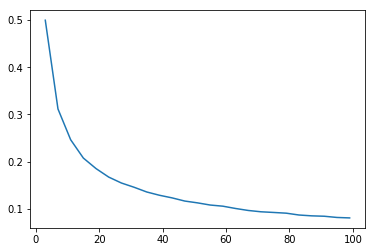

Chances of swing vote in a family of 3 kids: 0.50031
Chances of swing vote in a classroom of 31 kids: 0.14431
Chances of swing vote in a school of 301 kids: 0.04674


In [6]:
# LETS DO NUMPY

import numpy as np
import matplotlib.pyplot as plt
import timeit

def numpyChancesOfSwingVote(n):
    # number of simulations
    N = 100000
    
    # a binomial distribution of n voters with equal choice of 50% among [0,1]
    # lets create N such rows ie. (N,n) 
    u = np.random.binomial(1,0.5,(N,n)) 
    
    # number of times the last voter makes a difference
    ctr = 0
    
    for i in range(N):
        arr = u[i]
        
        # get rid of the last voter
        excludelast = arr[:n-1] 
        
        # you want to count how many votes are 0 and how many are 1
        bc = np.bincount(excludelast.ravel())
        
        #print(bc)
        # If the zero-votes are identical to one-votes excluding the last voter
        # then the last voter makes a difference!
        if len(bc) == 2 and bc[0] == bc[1]:
            ctr += 1
    
    # spit out the ratio of subset size over total size
    return ctr/N

start_time = timeit.default_timer()

X = np.arange(3,101,4)
Y = list(map(numpyChancesOfSwingVote, X))
elapsed1 = timeit.default_timer() - start_time

plt.plot(X,Y)
plt.show()

# Family of 3 kids
print("Chances of swing vote in a family of 3 kids: " + str(numpyChancesOfSwingVote(3)))

# Class of 31 kids
print("Chances of swing vote in a classroom of 31 kids: " + str(numpyChancesOfSwingVote(31)))

# A school of 301 kids
print("Chances of swing vote in a school of 301 kids: " + str(numpyChancesOfSwingVote(301)))